<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="display:flex; justify-content:space-around; align-items:center; background-color:#cccccc; padding:5px; border:2px solid #333333;">
    <a href="https://estudios.upct.es/grado/5251/inicio" target="_blank">
    <img src="https://www.upct.es/contenido/universidad/galeria/identidad-2021/logos/logos-upct/marca-upct/marca-principal/horizontal/azul.png" alt="UPCT" style="height:145px; width:auto;">
    <a href="https://www.um.es/web/estudios/grados/ciencia-ingenieria-datos/" target="_blank">
    <img src="https://www.um.es/documents/1073494/42130150/LogosimboloUMU-positivo.png" alt="UMU" style="height:200px; width:auto;">
</div>

# Asignatura: **Deep Learning**

## Titulación: **Grado en Ciencia e Ingeniería de Datos**

## Práctica 1: Introducción al Deep Learning
### **Sesión 2/3: Limitaciones clásicas y redes neuronales actuales**

**Autores**: Juan Morales Sánchez, Antonio Martínez Sánchez, José Luís Sancho Gómez y Juan Antonio Botía Blaya

___

### Objetivos

- Comprender las limitaciones clásicas de las redes neuronales.
- Analizar problemas como el estancamiento del entrenamiento, la explosión de gradientes y el sobreentrenamiento.
- Explorar soluciones prácticas a estos problemas: técnicas como inicialización de pesos, funciones de activación avanzadas, normalización y regularización.
- Estudiar aspectos relacionados con la eficiencia computacional: cálculo tensorial, impacto del hardware de aceleración de cómputo.
- Aplicar técnicas de optimización y regularización.

### Contenidos
- [Eficiencia computacional](#eficiencia)
- [Operaciones con tensores](#eficiencia_tensores)
- [Diferenciación automática](#eficiencia_diferenciacion)
- [Cómputo eficiente sobre GPU](#eficiencia_gpu)
- [El estancamiento del entrenamiento](#estancamiento)
- [La explosión de gradiente](#explosion)
- [El sobreentrenamiento](#sobreentrenamiento)
- [Ejercicios](#ejercicios)

### Bibliografía
- [Deep Learning with Python (segunda edición)](https://www.manning.com/books/deep-learning-with-python-second-edition)
- [Dive into Deep Learning](https://d2l.ai/)

### Requisitos
<a class='anchor' id='requisitos'></a>

Se trabajará con notebooks de [Jupyter](https://jupyter.org/install) con código Python empleando como intérprete la última versión de [Miniconda](https://docs.anaconda.com/miniconda/). Se requiere la preinstalación (se recomienda utilizar [pip](https://pypi.org/project/pip/)) de los siguientes paquetes de Python:

- [Numpy](https://pypi.org/project/numpy/) (computación numérica)
- [Scipy](https://pypi.org/project/scipy/) (computación científica)
- [Scikit-learn](https://pypi.org/project/scikit-learn/) (*Machine Learning*)
- [Scikit-image](https://pypi.org/project/scikit-image/) (*Image Processing*)
- [Matplotlib](https://pypi.org/project/matplotlib/) y [Seaborn](https://pypi.org/project/seaborn/) (visualización de datos)
- [Tensorflow](https://www.tensorflow.org/) 2.x que incluye a [Keras](https://www.tensorflow.org/guide/keras) 2.x (*Deep Learning*)


<div style="page-break-before: always;"></div>

<a class='anchor' id='eficiencia'></a>

## Eficiencia computacional

Las redes neuronales modernas exigen una gran cantidad de cómputo debido a la complejidad de sus arquitecturas, el tamaño de los datos que procesan y las operaciones matemáticas involucradas. Aquí te detallo las principales razones:

- **Modelos con un gran número de parámetros**: Las redes neuronales actuales, especialmente los modelos profundos, suelen tener millones o incluso billones de parámetros entrenables (pesos y sesgos). Durante el entrenamiento, cada parámetro necesita ser actualizado usando algoritmos de optimización como el descenso de gradiente.

- **Operaciones matemáticas intensivas**: El núcleo de las redes neuronales implica cálculos altamente costosos desde el punto de vista computacional: Multiplicaciones de tensores, funciones de activación que se aplican a millones de valores en cada capa, cálculo de gradientes en el algoritmo de retropropagación para cada parámetro y capa.

- **Tamaño de los datos**: Los modelos modernos entrenan con conjuntos de datos masivos, a menudo en el rango de terabytes o más, y cada dato de entrada pasa por múltiples capas, lo que implica realizar operaciones repetitivas y escalables en grandes volúmenes de datos.

- **Redes profundas y arquitecturas complejas**: Las redes modernas tienen arquitecturas mucho más profundas y complejas que las redes tradicionales, por ejemplo ResNet-152 tiene más de 152 capas. Más capas implica más operaciones a realizar en cada pasada hacia adelante y hacia atrás.

- **Pruebas y ajustes de hiperparámetros**: El desarrollo de redes neuronales también incluye la **optimización de hiperparámetros** y la **validación cruzada**, lo que en la práctica obliga a entrenar y evaluar múltiples versiones del modelo en diferentes subconjuntos de datos.

- **Inferencia en producción**: Incluso después de entrenar un modelo, la inferencia en producción puede ser costosa. GPT-3, por ejemplo, ya requiería varios gigabytes de memoria y tiempo de cálculo significativo para generar texto.

Repasaremos a continuación, y de forma práctica, algunos de estos aspectos relevantes para la eficiencia de cómputo en *Deep Learning*.

<a class='anchor' id='eficiencia_tensores'></a>

### Operaciones con tensores

Los tensores son esenciales para manejar y transformar datos numéricos de manera eficiente en arquitecturas complejas. Estas operaciones se realizan de manera eficiente utilizando librerías optimizadas como Numpy, TensorFlow, PyTorch o JAX, que en muchos casos ofrecen compatibilidad directa con hardware de aceleración del cómputo (GPUs y TPUs) así como capacidad de paralelización entre diferentes dispositivos.

Los tensores fluyen a través de la red desde las capas de entrada hasta las capas de salida, y las operaciones se estructuran como un grafo de computación. Por tanto, los tensores son la base sobre la que se construyen los modelos de *Deep learning*.

#### Ejemplo comparativo de la eficiencia computacional de las operaciones tensoriales

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar 1000 muestras con 2 características cada una
x_data = np.random.rand(1000, 2)  # Valores en el rango [0, 1]

# Calcular etiquetas según la regla dada
y_data = (x_data.sum(axis=1) > 1).astype(int)


# Dividir en conjuntos de entrenamiento y prueba (80/20) con estratificación
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Construir el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en prueba: {loss:.4f}, Precisión en prueba: {accuracy:.4f}")



# Realizar predicciones en nuevas muestras(x_test)

predictions = model.predict(X_test[:20])
predicted_classes = (predictions > 0.5).astype(int)
print("Predicciones:", predicted_classes.flatten())
print("Etiquetas reales:", y_test[:20])

Epoch 1/30


c:\Users\ruben\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4968 - loss: 0.7209 - val_accuracy: 0.4437 - val_loss: 0.6991
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4802 - loss: 0.6956 - val_accuracy: 0.6687 - val_loss: 0.6771
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6213 - loss: 0.6743 - val_accuracy: 0.6938 - val_loss: 0.6575
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6624 - loss: 0.6572 - val_accuracy: 0.6938 - val_loss: 0.6384
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7120 - loss: 0.6343 - val_accuracy: 0.7437 - val_loss: 0.6175
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7719 - loss: 0.6118 - val_accuracy: 0.8062 - val_loss: 0.5950
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8322 - loss: 0.5889 - val_accuracy: 0.8375 - val_loss: 0.5698
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8520 - loss: 0.5535 - val_accuracy: 0.8562 - val_loss: 0.5432
E

In [2]:
# Estimación del tiempo de cómputo de operaciones con implementación ingenua
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

t0 = time.time()
for _ in range(5000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Tiempo de cómputo : {0:.2f} s".format(time.time() - t0))

Tiempo de cómputo : 7.63 s


In [3]:
# Estimación del tiempo de cómputo de operaciones con implementación tensorial
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(5000):
    z = x + y
    z = np.maximum(z, 0.)
print("Tiempo de cómputo: {0:.2f} s".format(time.time() - t0))

Tiempo de cómputo: 0.02 s


<a class='anchor' id='eficiencia_diferenciacion'></a>

### Optimización basada en gradientes: diferenciación automática

En matemáticas y álgebra computacional, la **diferenciación automática** o **autodiferenciación** hace referencia a un conjunto de técnicas para evaluar la derivada parcial de una función especificada por una secuencia de operaciones de cómputo. La diferenciación automática es la idea central para automatizar el cálculo simultáneo de los valores numéricos de funciones arbitrariamente complejas y de sus derivadas, sin necesidad de la representación simbólica de la función o de su derivada, solo se requiere la secuencia o algoritmo que aplica la función. La autodiferenciación es en teoría exacta, y mucho más eficiente computacionalmente, en comparación con algoritmos simbólicos u otro métodos numéricos tradicionales basados en diferencias finitas.

La diferenciación automática explota el hecho de que cada cálculo, por complicado que sea, se ejecuta una secuencia de operaciones aritméticas elementales (suma, resta, multiplicación, división, etc.) y funciones básicas (exp, log, sin, cos, etc.). Al aplicar la regla de la cadena repetidamente a estas operaciones, las derivadas parciales de orden arbitrario se pueden calcular automáticamente.

Las operaciones con tensores en marcos de trabajo como TensorFlow y PyTorch son diferenciables. Esto significa que estos *frameworks* pueden calcular gradientes automáticamente de dichas operaciones, para optimizar los parámetros del modelo durante el entrenamiento.

### Grafos de computación

La diferenciación automática puede funcionar en modo [*forward* o *backward*](https://pytorch.org/blog/overview-of-pytorch-autograd-engine/), haciendo referencia a que 

* en *forward* o hacia delante: podemos aprovechar para calcular los gradientes conforme vamos recorriendo la red neuronal hacia delante, mientras vamos haciendo también la inferencia de la muestra de entrada

* en *backward* o hacia atrás: una vez hemos hecho la inferencia y calculamos la pérdida, construimos el grafo que nos permite el cómputo de los gradientes en cadena y en tiempo de ejecución.

Para diferenciar automáticamente, [TensorFlow](https://www.tensorflow.org/guide/autodiff) necesita recordar qué operaciones suceden y en qué orden durante el paso hacia adelante. Luego, durante el paso hacia atrás, TensorFlow recorre esta lista de operaciones en orden inverso para calcular los gradientes.

TensorFlow proporciona la API `tf.GradientTape` para la diferenciación automática, es decir, para calcular el gradiente de una operación con respecto a ciertas entradas, generalmente del tipo `tf.Variable`. TensorFlow "graba" las operaciones matemáticas relevantes ejecutadas dentro de un contexto denominado `tf.GradientTape` en una "cinta". En una segunda fase, TensorFlow utiliza dicha "cinta" (grafo de computación) para calcular, mediante la diferenciación en modo inverso, los gradientes de cada operación matemática previamente "grabada".

Veamos un par de ejemplos sencillos en TensorFlow para ilustrar el funcionamiento interno de `tf.GradientTape`:

1. Una función simple $y = x^2 + 3x + 5$, donde `tf.GradientTape` registra las operaciones realizadas en $y$, para calcular el gradiente respecto a $x$.
2. Una función más compleja $z = 3x^2 + 2xy + y^2$, donde `tf.GradientTape` registra las operaciones realizadas en $z$, para calcular gradientes respecto a $x$ e $y$.

In [3]:
import tensorflow as tf

# Definir una función simple
@tf.function
def simple_function(x):
    return x**2 + 3 * x + 5

# Crear un grafo de computación con tf.GradientTape
x = tf.Variable(2.0)  # Variable inicial
with tf.GradientTape() as tape:
    y = simple_function(x)  # Calcula y en función de x

# Calcular el gradiente de y respecto a x
gradient = tape.gradient(y, x)

# Mostrar resultados
print(f"Valor de la variable (x): {x.numpy()}")
print(f"Valor de la función (y): {y.numpy()}")
print(f"Gradiente de y respecto a x (dy/dx): {gradient.numpy()}\n")

# Un caso más complejo con múltiples variables
@tf.function
def multi_variable_function(x, y):
    return 3 * x**2 + 2 * x * y + y**2

# Crear variables
x_var = tf.Variable(1.0)
y_var = tf.Variable(2.0)
with tf.GradientTape() as tape:
    z = multi_variable_function(x_var, y_var)  # Calcula z

# Calcular gradientes de z respecto a x_var y y_var
gradients = tape.gradient(z, [x_var, y_var])

# Mostrar resultados del caso múltiple
print(f"Valor de la variable (x): {x.numpy()}")
print(f"Valor de la variable (y): {y.numpy()}")
print(f"Valor de la función (z): {z.numpy()}")
print(f"Gradiente de z respecto a x (dz/dx): {gradients[0].numpy()}")
print(f"Gradiente de z respecto a y (dz/dy): {gradients[1].numpy()}")


Valor de la variable (x): 2.0
Valor de la función (y): 15.0
Gradiente de y respecto a x (dy/dx): 7.0

Valor de la variable (x): 2.0
Valor de la variable (y): 15.0
Valor de la función (z): 11.0
Gradiente de z respecto a x (dz/dx): 10.0
Gradiente de z respecto a y (dz/dy): 6.0


<a class='anchor' id='eficiencia_gpu'></a>

### Paralelización y cómputo eficiente sobre GPU

Las GPUs están optimizadas para realizar cálculos tensoriales paralelos, como productos matriciales y convoluciones, de manera mucho más rápida que una CPU. También pueden combina múltiples operaciones en un único kernel para reducir la latencia y mejorar la eficiencia (Tensor Cores en GPUs NVIDIA).

TensorFlow está diseñado para aprovechar las características de las GPUs y también TPUs. Si hay una GPU compatible instalada y configurada con CUDA/cuDNN, TensorFlow utilizará la GPU de manera predeterminada para operaciones intensivas como multiplicaciones de matrices y convoluciones, aunque también es posible realizar una detección automática de la presencia de GPU en el sistema, y asignar el cómputo al dispositivo preferido (CPU o GPU).

In [5]:
import tensorflow as tf

# Verificar disponibilidad de GPU
gpus = tf.config.list_physical_devices('GPU')
print("GPUs disponibles:", gpus)
device = '/GPU:0' if gpus else '/CPU:0'
print(f"Ejecutando en: {device}")

# Definir una operación intensiva
with tf.device(device):  # Especificar CPU/GPU
    x = tf.random.normal([5000, 5000])
    y = tf.matmul(x, x)  # Producto matricial

GPUs disponibles: []
Ejecutando en: /CPU:0


<a class='anchor' id='estancamiento'></a>

## Problemas numéricos: el estancamiento del entrenamiento

El estancamiento es un problema clásico que puede aparecer durante el entrenamiento de redes neuronales, debido al **desvanecimiento del gradiente**, que ocurre cuando se utiliza el algoritmo de Descenso Estocástico de Gradiente (SGD) para entrenar redes neuronales profundas, especialmente cuando se emplean funciones de activación como `sigmoid` o `tanh`. Este fenómeno se caracteriza por:

1. **Propagación de gradientes pequeños**:
   - Durante la retropropagación, los gradientes calculados para las capas más profundas (cercanas a la entrada) se multiplican repetidamente por las derivadas de las funciones de activación. Si estas derivadas son pequeñas, los gradientes disminuyen exponencialmente conforme retroceden hacia las primeras capas.

2. **Pesos que dejan de actualizarse**:
   - Gradientes extremadamente pequeños producen actualizaciones insignificantes para los pesos de las capas más cercanas a la entrada, lo que provoca que estas capas apenas aprendan.

3. **Entrenamiento estancado**:
   - El modelo tarda en converger o no mejora, lo cual se observa en curvas planas de pérdida a lo largo de las épocas.

Las soluciones habituales para este problema son:
1. **ReLU (Rectified Linear Unit)**:
   - Evita el desvanecimiento porque su derivada es constante (1 para valores positivos).
   - Ejemplo:
   ```python
      model = models.Sequential([
         layers.Dense(64, activation='relu', input_shape=(2,)),
         layers.Dense(1, activation='sigmoid')
      ])
   ```
2. **Batch Normalization**:
   - Normaliza las entradas de cada capa, reduciendo la dependencia de valores extremos.
   - Ejemplo:
   ```python
      model = models.Sequential([
         layers.Dense(100, activation='relu', input_shape=(10, )),
         layers.BatchNormalization(),
         layers.Dense(5, activation='softmax')
      ])
   ```
3. **Optimizadores avanzados**:
   - Optimizadores como Adam ajustan dinámicamente la tasa de aprendizaje, mitigando el problema.
   - Ejemplo:
   ```python
      optimizer = optimizers.Adam(learning_rate=0.001)
   ```
4. **Inicialización de pesos**:
   - Inicializaciones como ``Xavier`` (también denominada ``glorot_uniform`` en TensorFlow), diseñada para funciones de activación como ``sigmoid`` o ``tanh``, buscan mantener la varianza de las activaciones a través de las capas de la red, reduciendo la saturación de las funciones de activación y previniendo que los gradientes se vuelvan demasiado pequeños o grandes.
   - Ejemplo:
   ```python
      model = Sequential([
         layers.Dense(128, kernel_initializer = 'glorot_uniform'),
         layers.Dense(1, activation='sigmoid')
      ])
   ```

En el ejemplo que se muestra a continuación, el modelo con activación `sigmoid`, sin inicialización de pesos, y optimizador SGD muestra estancamiento. Esto ilustra claramente el efecto del desvanecimiento del gradiente.

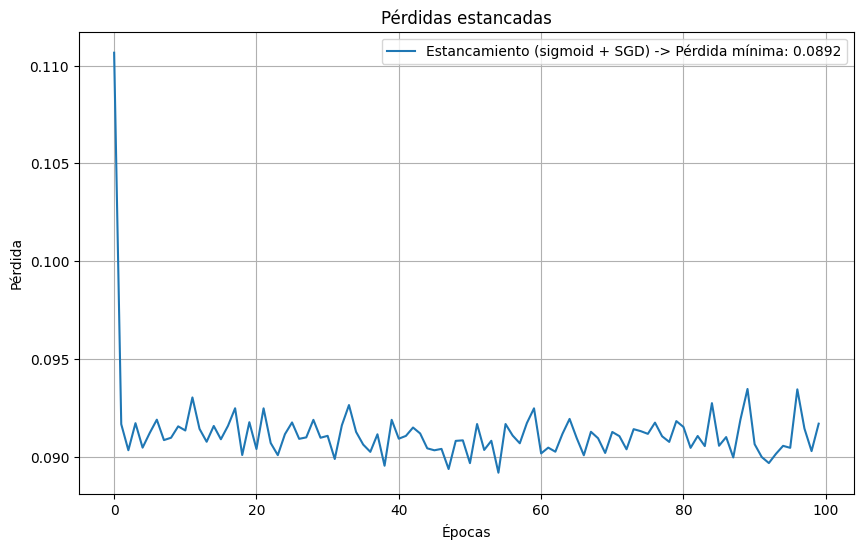

In [7]:
# Ejemplo de red neuronal en TensorFlow que muestra el problema de estancamiento del entrenamiento
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt

# Generar un dataset sintético
x = np.linspace(-1, 1, 1000)
y = x ** 2  # Relación no lineal

# Dividir los datos
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

# Crear un modelo de red profunda para provocar desvanecimiento del gradiente
model = Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(1,), kernel_initializer='zeros'),
    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),

    layers.Dense(128, activation='sigmoid', kernel_initializer='zeros'),
    layers.Dense(1)  # Salida de una sola neurona
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse')

# Entrenamiento
history_stagnant = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Representar las pérdidas del modelo
plt.figure(figsize=(10, 6))
plt.plot(history_stagnant.history['loss'], label=f"Estancamiento (sigmoid + SGD) -> Pérdida mínima: {min(history_stagnant.history['loss']):.4f}")
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdidas estancadas')
plt.legend()
plt.grid(True)
plt.show()

<a class='anchor' id='explosion'></a>

## Problemas numéricos: la explosión de gradiente

El **problema de la explosión de gradiente** ocurre durante el entrenamiento de redes neuronales, especialmente en redes profundas o recurrentes. Se caracteriza por un crecimiento descontrolado de los gradientes a medida que estos se propagan hacia atrás, lo que puede llevar a que los pesos del modelo tomen valores extremadamente grandes y hagan que el entrenamiento sea inestable o que diverja, ya que la función de pérdida puede alcanzar valores muy altos o incluso errores numéricos (``NaN``).

Hay que recordar que para actualizar los pesos durante la retropropagación se utiliza la regla de la cadena, de manera que cada gradiente se calcula multiplicando los gradientes de las capas anteriores. En una red profunda este cálculo implica multiplicar muchos valores (uno por capa).

Por tanto, es fácil intuir que explosión de gradiente puede ocurrir con mayor probabilidad si:
   - La red es muy profunda.
   - Los pesos están mal inicializados.
   - Las funciones de activación tienen derivadas grandes.

Algunas soluciones para mitigar la posibilidad de explosión de gradiente son:

1. **Saturación de gradientes**:
   - Restringe los gradientes para que no excedan un valor máximo predeterminado.
   - Ejemplo:
     ```python
     optimizer = optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
     ```

2. **Inicialización adecuada de pesos**:
   - Utiliza esquemas de inicialización como **Xavier** o **He**, que están diseñados para mantener los gradientes en un rango estable.
   - Ejemplo:
     ```python
     model = Sequential([
         layers.Dense(128, activation='relu', kernel_initializer = 'he_normal'),
         layers.Dense(1, activation='sigmoid')
     ])
     ```

3. **Funciones de activación adecuadas**:
   - **ReLU** y variantes como **Leaky ReLU** suelen ser menos propensas a la explosión de gradiente que funciones como **tanh** o **sigmoid**, porque tienen derivadas controladas.
   - Ejemplo:
      ```python
      model = models.Sequential([
         layers.Dense(64, activation='relu'),
         layers.Dense(1, activation='sigmoid')
      ])
      ```
4. **Normalización de gradientes**:
   - Técnicas como el ``BatchNormalization`` estabilizan el flujo de gradientes.
   - Ejemplo:
     ```python
     model = models.Sequential([
         layers.Dense(100, activation='relu'),
         layers.BatchNormalization(),
         layers.Dense(5, activation='softmax')
     ])
     ```
5. **Tasas de aprendizaje más pequeñas**:
   - Usar un valor bajo para la tasa de aprendizaje puede mitigar el problema, ya que las actualizaciones de los pesos serán más controladas.
   - Ejemplo:
     ```python
     optimizer = optimizers.SGD(learning_rate=0.00001)
     ```





<a class='anchor' id='sobreentrenamiento'></a>

## El sobreentrenamiento

El **sobreentrenamiento** (u *overfitting*) en *Deep Learning* ocurre cuando un modelo recuerda en exceso los detalles y patrones específicos del conjunto de entrenamiento, incluyendo el ruido o anomalías en los datos, pero no generaliza bien a datos nuevos o no vistos (como los de validación o test). Esto produce un rendimiento **MUY** alto en el conjunto de entrenamiento(debido al sobreajuste) pero bajo en los otros conjuntos no conocidos. Las causas más comunes del sobreentrenamiento suelen ser:

1. **Modelo demasiado complejo**:
   - Redes neuronales con demasiados parámetros (como muchas capas o neuronas) tienden a memorizar los datos de entrenamiento en lugar de aprender patrones generales.

2. **Cantidad insuficiente de datos**:
   - Con pocos datos de entrenamiento, el modelo tiene menos ejemplos para aprender patrones generales y tiende a ajustarse a los datos disponibles.

3. **Ruido en los datos**:
   - Si los datos de entrenamiento contienen errores, inconsistencias o ruido, el modelo puede ajustarse a estos valores irrelevantes.

4. **Entrenamiento excesivo**:
   - Continuar entrenando después de que el modelo ha alcanzado su punto óptimo en el conjunto de validación puede llevar a que aprenda patrones específicos no útiles.

El sobreentrenamiento se puede identificar si representamos las curvas de pérdida durante el entrenamiento, ya que la **pérdida de entrenamiento** sigue disminuyendo debido a que el modelo ajusta sus parámetros a los datos, pero la **pérdida de validación** comienza a aumentar después de un punto inflexión (sobreentrenamiento), a partir del cual el modelo empieza a memorizar en lugar de generalizar. Por tanto, son indicadores del sobreentrenamiento:

1. **La pérdida de entrenamiento disminuye mientras que la pérdida de validación aumenta**:
   - Este comportamiento puede observarse en las curvas de pérdida durante el entrenamiento.
   
2. **Discrepancia entre métricas de entrenamiento y validación**:
   - Alta precisión en el entrenamiento, pero baja precisión en la validación o prueba.

3. **Inconsistencia en la predicción**:
   - El modelo funciona bien con datos de entrenamiento, pero falla en generalizar a nuevos ejemplos.

Entre las soluciones soluciones al sobreentrenamiento se encuentran:

1. **Regularización**:
   - Técnicas como ``Dropout``, regularización de pesos L1/L2, decaimiento de pesos (*Weight Decay*) penalizan los pesos grandes del modelo, promoviendo soluciones más simples.
   - Ejemplos:
      - Aplicación de un factor de ``Dropout`` del 20%, desconectando aleatoriamente un porcentaje de conexiones neuronales:
        ```python
        model = models.Sequential([
           layers.Dense(100, activation='relu', input_shape=(10, )),
           layers.Dropout(0.2),
           layers.Dense(5, activation='softmax')
        ])
        ```
      - Regularización L2 en capas concretas de la red (penalización sobre el gradiente por pesos elevados):
        ```python
        model = Sequential([
           layers.Dense(64, activation='relu', input_shape=(2,),
                        kernel_regularizer=regularizers.l2(0.01)),
           layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
        ])
        ```
      - Ajuste de la tasa de aprendizaje y decaimiento sobre todos los pesos (regularización L2 a nivel de optimizador):
        ```python
        optimizer = optimizers.Adam(weight_decay=0.01)
        ```

2. **Parada anticipada (*Early Stopping*)**:
   - Detener el entrenamiento cuando la pérdida de validación deja de mejorar.
   - Ejemplo:
     ```python
     from tensorflow.keras.callbacks import EarlyStopping
         early_stopping = EarlyStopping(
         monitor = 'val_loss', 
         patience = 5, 
         restore_best_weights = True
     )
     history = model.fit(
         x_train, y_train,
         epochs=100,
         callbacks = [early_stopping]
     )
     ```

3. **Aumentación de datos**:
   - Crear nuevas variaciones de los datos de entrenamiento (rotaciones, zoom, cambios de brillo) para mejorar la generalización.
<!---
   - Ejemplo:
     ```python
     model = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        ......
     ])
   ```
-->

4. **Conjuntos de datos más numeroso**:
   - Obtener más datos para que el modelo tenga suficientes ejemplos para aprender patrones generales.

5. **Modelos más simples**:
   - Reducir la complejidad del modelo (menos capas o menos neuronas) o ajuste de hiperparámetros.

Veamos un pequeño ejemplo de un problema de regresión en el que se puede observar el sobreentrenamiento:

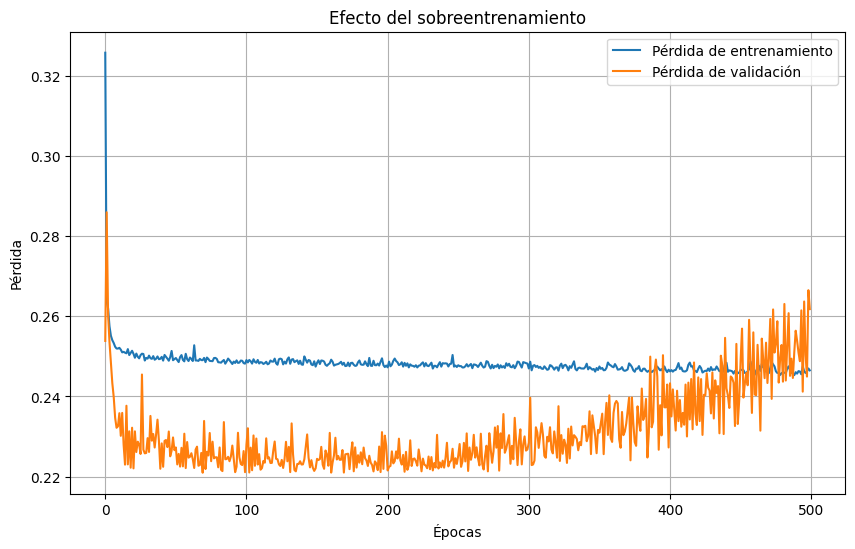

Pérdida final en entrenamiento: 0.2465
Pérdida final en validación: 0.2618


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt

# Generar un dataset sintético
np.random.seed(88) 
x = np.linspace(-1, 1, 1000)
y = x ** 2 + np.random.normal(0, 0.5, 1000)  # Relación no lineal con ruido

# Dividir los datos
x_train = x[:800].reshape(-1, 1)
y_train = y[:800].reshape(-1, 1)
x_val = x[800:].reshape(-1, 1)
y_val = y[800:].reshape(-1, 1)

# Crear un modelo sencillo
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    batch_size=32,
    verbose=0
)

# Graficar las curvas de pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Efecto del sobreentrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Analizar el sobreentrenamiento
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Pérdida final en entrenamiento: {train_loss:.4f}")
print(f"Pérdida final en validación: {val_loss:.4f}")


<a class='anchor' id='ejercicios'></a>

## Ejercicios

**E1:** Partiendo del código proporcionado en el apartado previo referido al problema del [estancamiento del entrenamiento](#estancamiento), evalúe **por separado** y de **forma combinada** las soluciones básicas mencionadas en el referido apartado, y:

1. **Represente gráficamente de forma conjunta la función de pérdidas** de la versión inicial y todas las soluciones (individuales o combinación de ellas).

2. **Elabore una tabla** que muestre para cada una de las soluciones (o combinación de ellas) **el valor de la pérdida mínima alcanzada y la época aproximada de saturación del entrenamiento** (*codo* de la curva de pérdida), indicando cual considera que es la mejor solución.


**E2:** Partiendo del código proporcionado en el apartado previo referido al problema del [sobreentrenamiento](#sobreentrenamiento), evalúe **por separado** y de **forma combinada** las soluciones básicas mencionadas en el referido apartado, y:

1. **Represente gráficamente de forma conjunta la función de pérdidas** de la versión inicial y todas las soluciones (individuales o combinación de ellas).

2. **Elabore una tabla** que muestre para cada una de las soluciones (o combinación de ellas) **el valor de la pérdida mínima alcanzada y la época aproximada de saturación del entrenamiento** (*codo* de la curva de pérdida), indicando cual considera que es la mejor solución.